In [ ]:
#Packages and Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [14]:
#Code from professor to make the plots look good!
def make_plots_pretty(myPlot, title, xlabel, ylabel, figsize=(10,6)):
    try:
        myPlot.set_title(title, fontsize=16)
        myPlot.set_xlabel(xlabel, fontsize=14)
        myPlot.set_ylabel(ylabel, fontsize=14)
    except Exception as e:
        print(f"Error occurred while making plots pretty: {e}")
    plt.tight_layout()
    plt.show()

### Load Dataset

In [ ]:
#Import Data and combine into DataFrame
t1 = pd.read_csv("./transactions-1.csv")
t2 = pd.read_csv("./transactions-2.csv")
df = pd.concat([t1, t2], ignore_index=True)
df.head()

### Data Exploration

In [ ]:
#df.info() tells us the number of rows and null counts
df.info()

#No missing values in this dataset - but we need to explore categorical values
#df.describe() tells us summary statistics for numerical features
df.describe().T
#When you include object, you are asking it to describe categorical features
#Normal amounts of unique values
df.describe(include='object').T

### Columns

transaction_id: ID of the transaction

user_id: User who made the transaction

account_age_days: The age of the account in days

total_transactions_user: Number of transactions per user. Not at transaction granularity.

avg_amount_user: Average transaction amount per user. Not at transaction granularity

amount: transacion amount.

country: The user's country

bin_country: country of card issuing bank

channel: web or app

merchant_category: The type of purchase: electronics, fashion, grocery, gaming, travel

promo_used: whether a discount/promo was used

avs_match: address verification result

cvv_result: CVV code match result

three_ds_flag: 3D Secure enabled

transaction time: transaction timestamp (UTC)

shipping_distance: Distance between shipping and billing address

is_fraud: Target variable



### Info and Describe

0 null columns. No null handling or imputing required.

In [ ]:
#df.info() tells us the number of rows and null counts
df.info()

#No missing values in this dataset - but we need to explore categorical values
#df.describe() tells us summary statistics for numerical features
df.describe().T
#When you include object, you are asking it to describe categorical features
#Normal amounts of unique values
df.describe(include='object').T

## Univariate Analysis - Histograms and Boxplots

### From the histogram plots we see the following:

##### Distributions:

uniformly distributed account_age_days

##### Skewed Right: 

Avg_Amount_User, Amount, Shipping_Distance_km

##### Outliers:

Outliers prsent in avg_amount_user, amount, shipping_distance_km

##### Class Imbalance

Class Imbalance is present (is_fraud)

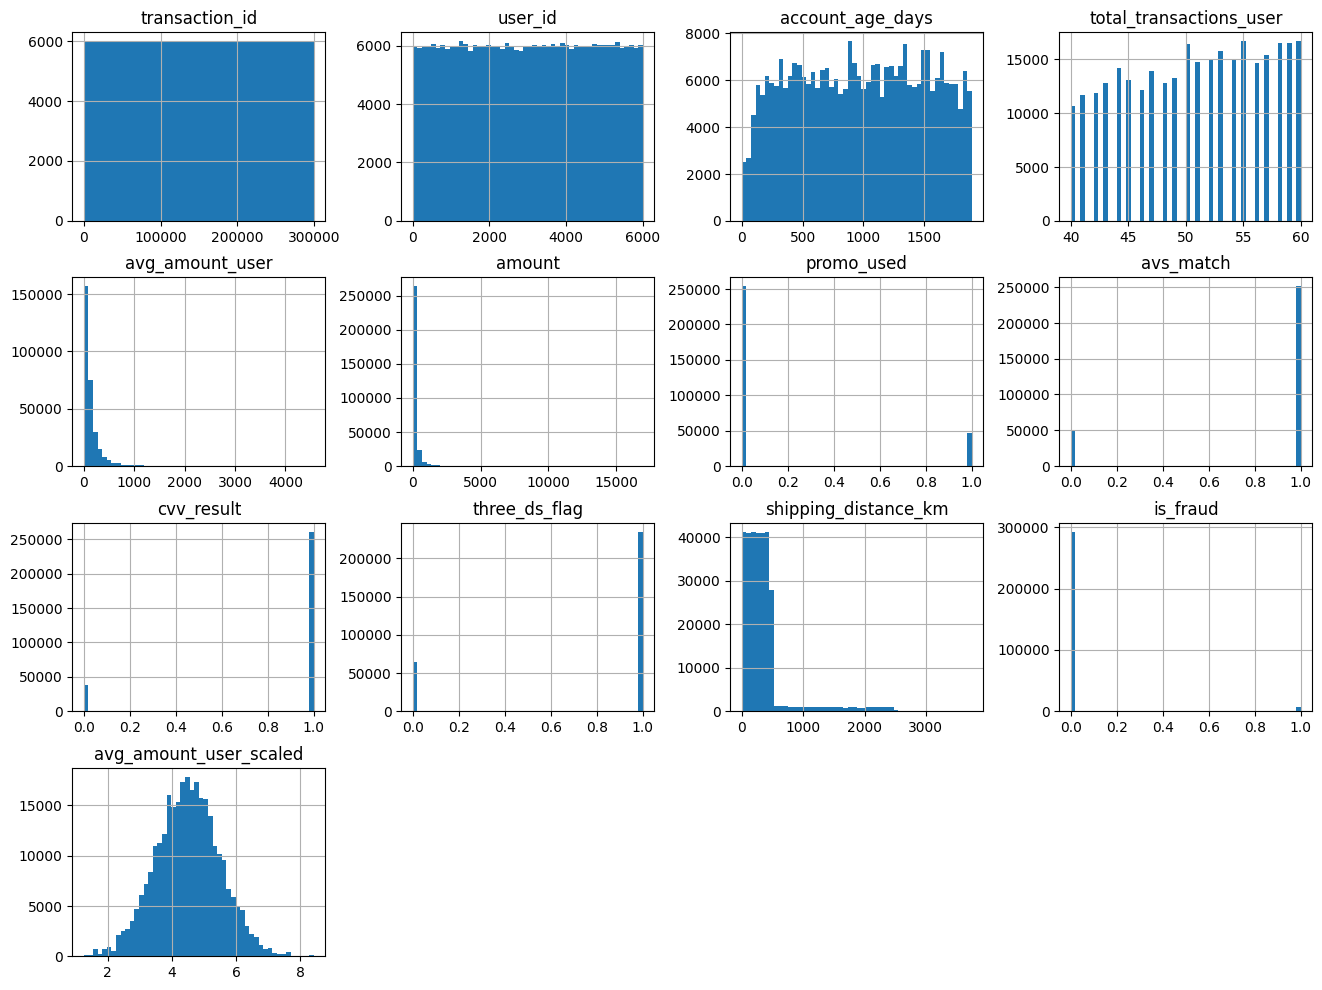

In [17]:
df.hist(bins=50, figsize=(16,12))
plt.show()

In [ ]:
# Box Plots to review numerical distributions. 
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(16,12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### Transform Numerical Columns

Log Transform avg_amount_user, amount, shipping_distance_dm

In [ ]:
df.columns

#### Scale Avg_Amount_User

In [15]:
#scale BMI using log
df['avg_amount_user_scaled'] = np.log(df['avg_amount_user'])

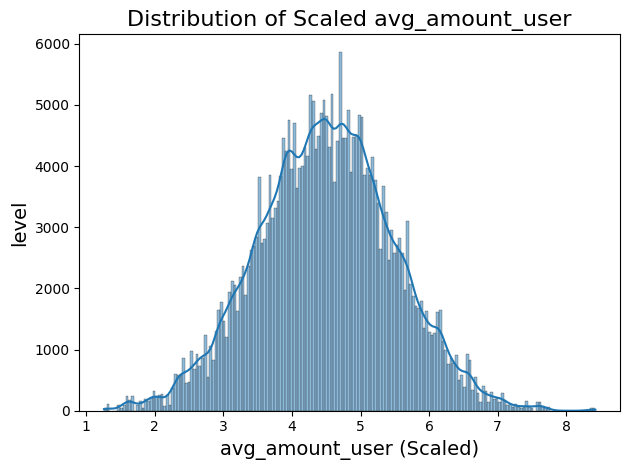

In [16]:
#View the distribution of the scaled avg_amount_user_scaled
avg_amount_user_scaled_hist = sns.histplot(df['avg_amount_user_scaled'], kde=True)
make_plots_pretty(avg_amount_user_scaled_hist, "Distribution of Scaled avg_amount_user", 'avg_amount_user (Scaled)','level')

In [18]:
#scale Amount using log
df['amount_scaled'] = np.log(df['amount'])

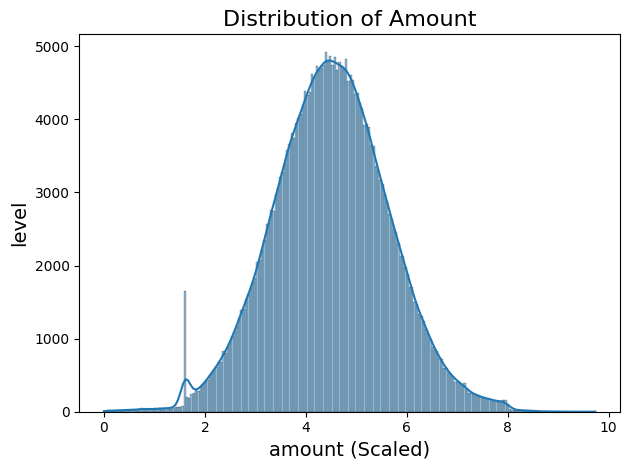

In [19]:
#View the distribution of the scaled amount
avg_amount_user_scaled_hist = sns.histplot(df['amount_scaled'], kde=True)
make_plots_pretty(avg_amount_user_scaled_hist, "Distribution of Amount", 'amount (Scaled)','level')

In [ ]:
#scale shipping_distance_km using log
df['shipping_distance_km_scaled'] = np.log(df['shipping_distance_km'])